In [2]:
import pandas as pd
import numpy as np
import os
import math
import graphlab
import graphlab as gl
import graphlab.aggregate as agg
from graphlab import SArray

In [2]:
'''钢炮'''
path = '/home/zongyi/bimbo_data/'
train = gl.SFrame.read_csv(path + 'train_lag5_w8.csv', verbose=False)

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:315: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#snimissingwarning.
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


This non-commercial license of GraphLab Create for academic use is assigned to zong-yi.liu@irit.fr and will expire on July 13, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.0.1 started. Logging: /tmp/graphlab_server_1472154436.log


In [3]:
town = gl.SFrame.read_csv(path + 'towns.csv', verbose=False)
train = train.join(town, on=['Agencia_ID','Producto_ID'], how='left')
train = train.fillna('t_c',1)
train = train.fillna('tcc',0)
train = train.fillna('tp_sum',0)
train = train.fillna('n_t',0)
# del train['Town']

In [4]:
del train['id']
del train['Venta_uni_hoy']
del train['Venta_hoy']
del train['Dev_uni_proxima']
del train['Dev_proxima']
del train['Demanda_uni_equil']


In [5]:
relag_train = gl.SFrame.read_csv(path + 're_lag_train.csv', verbose=False)
train = train.join(relag_train, on=['Cliente_ID','Producto_ID','Semana'], how='left')
train = train.fillna('re_lag1',0)
train = train.fillna('re_lag2',0)
train = train.fillna('re_lag3',0)
train = train.fillna('re_lag4',0)
train = train.fillna('re_lag5',0)
train['re_sum'] = (train['re_lag1'] + train['re_lag2'] + train['re_lag3'] + train['re_lag4'] + train['re_lag5'])/5
del relag_train


In [6]:
pd = gl.SFrame.read_csv(path + 'products.csv', verbose=False)
train = train.join(pd, on=['Producto_ID'], how='left')
train = train.fillna('prom',0)
train = train.fillna('weight',0)
train = train.fillna('pieces',1)
train = train.fillna('w_per_piece',0)
train = train.fillna('healthy',0)
train = train.fillna('drink',0)
del pd

In [7]:
client = gl.SFrame.read_csv(path + 'clients.csv', verbose=False)
train = train.join(client, on=['Cliente_ID'], how='left')
del client


In [8]:
del train['Semana']
del train['Canal_ID']
# del train['tcc']
del train['re_lag1']
del train['re_lag2']
del train['re_lag3']
del train['re_lag4']
del train['re_lag5']
del train['prom']
del train['healthy']
del train['drink']
del train['brand']
# del train['week_times']


In [9]:
print train.column_names()
print len(train.column_names())

['Agencia_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID', 'Demada_log', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'week_times', 'lag_sum', 'prior_sum', 'n_a', 'n_r', 'n_c', 'n_p', 'Town', 't_c', 'tcc', 'tp_sum', 'n_t', 're_sum', 'p_clt', 'weight', 'pieces', 'w_per_piece', 'price', 'c_clt']
29


In [10]:
train.save(path+'train_fs_w8.csv',format='csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

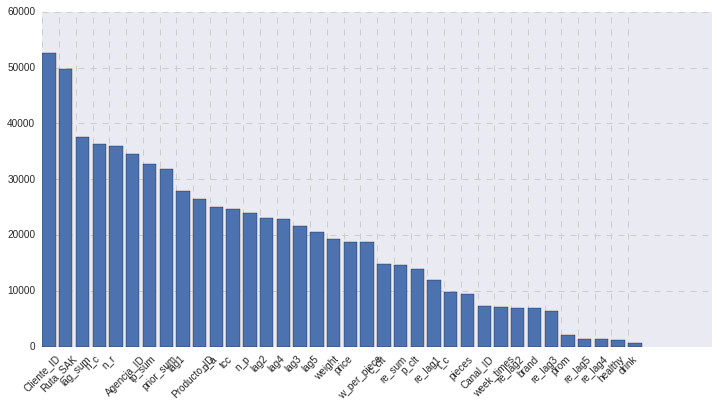

In [32]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'grid.color': '.8','grid.linestyle': u'--'}) 
%matplotlib inline

figsize(12, 6)
plt.bar(w['id'], w['count'], tick_label=w['name'])

plt.xticks(rotation=45)


In [17]:
path = '/home/zongyi/bimbo_data/'

test = gl.SFrame.read_csv(path + 'test_lag5_w9.csv', verbose=False)

In [18]:
town = gl.SFrame.read_csv(path + 'towns.csv', verbose=False)
test = test.join(town, on=['Agencia_ID','Producto_ID'], how='left')
test = test.fillna('t_c',1)
test = test.fillna('tcc',0)
test = test.fillna('tp_sum',0)
test = test.fillna('n_t',0)
# del test['Town']

In [19]:
relag_test = gl.SFrame.read_csv(path + 're_lag_test.csv', verbose=False)
test = test.join(relag_test, on=['Cliente_ID','Producto_ID','Semana'], how='left')
test = test.fillna('re_lag1',0)
test = test.fillna('re_lag2',0)
test = test.fillna('re_lag3',0)
test = test.fillna('re_lag4',0)
test = test.fillna('re_lag5',0)

def f(x):
    if x['Semana']==10:
        a = (x['re_lag1'] + x['re_lag2'] + x['re_lag3'] + x['re_lag4'] + x['re_lag5'])/5
    if x['Semana']==11:
        a = (x['re_lag2'] + x['re_lag3'] + x['re_lag4'] + x['re_lag5'])/4   
    return a
test['re_sum'] = test[['Semana','re_lag1', 're_lag2', 're_lag3','re_lag4','re_lag5']].apply(f)

# test['re_sum'] = (test['re_lag1'] + test['re_lag2'] + test['re_lag3'] + test['re_lag4'] + test['re_lag5'])/5

del test['re_lag1']
del test['re_lag2']
del test['re_lag3']
del test['re_lag4']
del test['re_lag5']


In [20]:
pd = gl.SFrame.read_csv(path + 'products.csv', verbose=False)
test = test.join(pd, on=['Producto_ID'], how='left')
test = test.fillna('prom',0)
test = test.fillna('weight',0)
test = test.fillna('pieces',1)
test = test.fillna('w_per_piece',0)
test = test.fillna('healthy',0)
test = test.fillna('drink',0)
del pd

In [21]:
client = gl.SFrame.read_csv(path + 'clients.csv', verbose=False)
test = test.join(client, on=['Cliente_ID'], how='left')
del client


In [28]:
# del test['Semana']
del test['Canal_ID']
# del test['tcc']
# del test['re_lag1']
# del test['re_lag2']
# del test['re_lag3']
# del test['re_lag4']
# del test['re_lag5']
del test['prom']
del test['healthy']
del test['drink']
del test['brand']

In [22]:
print test.column_names()
print len(test.column_names())

['id', 'Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag_sum', 'prior_sum', 'week_times', 'n_a', 'n_r', 'n_c', 'n_p', 'Town', 't_c', 'tcc', 'tp_sum', 'n_t', 're_sum', 'p_clt', 'prom', 'brand', 'weight', 'pieces', 'w_per_piece', 'healthy', 'drink', 'price', 'c_clt']
35


In [23]:
test.save(path+'test_fs_w9.csv',format='csv')